# Clustering jerárquico
#### UD3. Aprendizaxe non supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

## 1. Definición

El clustering jerárquico implica la creación de grupos que tienen un orden predeterminado de arriba hacia abajo. Por ejemplo, todos los archivos y carpetas del disco duro están organizados en una jerarquía. Hay dos tipos de clustering jerárquico: divisivo y aglomerativo.

### Método divisivo (Top-down o de arriba hacia abajo)

En este método asignamos todas las observaciones (o instancias) a un solo clúster y luego dividimos el clúster en dos clústers más similares a nivel de grupo. Finalmente, procedemos recursivamente con cada clúster hasta que haya un clúster para cada observación.

### Método aglomerativo (Bottom-up o de abajo hacia arriba)

En este método asignamos cada observación (o instancia) a su propio cluster. Luego, calculamos la similitud (por ejemplo, la distancia euclídea) entre cada uno de los clústers y unimos los dos clústers más similares. Finalmente, se repiten los pasos 2 y 3 hasta que solo quede un único cluster.

## 2. Matriz de distancia o enlace

Antes de realizar el clustering, se requiere determinar la matriz de proximidad que contiene la distancia entre cada punto utilizando una función de distancia. Luego, la matriz se actualiza para mostrar la distancia entre cada cluster. Los siguientes tres métodos difieren en cómo se mide la distancia entre cada cluster.

### Enlace único o simple

En el clustering jerárquico de enlace único o simple, la distancia entre dos clústers se define como la mínima distancia entre dos puntos de cada cluster. Por ejemplo, la distancia entre los grupos "r" y "s" a la izquierda es igual a la longitud de la flecha entre los dos puntos más próximos.

<img src=img/Clustering_single.png>

### Enlace completo

En el clustering jerárquico de enlace completo, la distancia entre dos grupos se define como la distancia más larga entre dos puntos en cada cluster. Por ejemplo, la distancia entre los grupos "r" y "s" es igual a la longitud de la flecha entre los dos puntos más lejanos.
<img src=img/Clustering_complete.png>

### Enlace promedio

En el clustering jerárquico de enlace promedio, la distancia entre dos conglomerados se define como la distancia promedio entre cada punto de un clúster y cada punto del otro clúster. Por ejemplo, la distancia entre los grupos "r" y "s" es igual a la longitud promedio entre los puntos de conexión de uno y otro clúster.
<img src=img/Clustering_average.png>

[Ejemplo del cálculo de una matriz de distancia de enlace simple (Simple Linkage)](https://people.revoledu.com/kardi/tutorial/Clustering/Numerical%20Example.htm)

## 3. Dendrogramas

Los [dendrogramas](https://en.wikipedia.org/wiki/Dendrogram) son diagramas de árbol que se utilizan con frecuencia para ilustrar la disposición de los clústers producidos por el clustering jerárquico. Los clados (o clústers hijos) se ordenan de acuerdo a cuán similares (o diferentes) son. Los clados que están cerca de la misma altura son similares entre sí; los clados con diferentes alturas son diferentes: cuanto mayor es la diferencia de altura, mayor es la diferencia.

A continuación se muestra un ejemplo relacionado con el conocido conjunto de datos Iris.

<img src=img/Iris_dendrogram.png height='400px' width = '400px'>

## 4. Demo

Ahora vamos a realizar una demo de clustering jerárquico sobre un dataset de tendencias de compra en un centro comercial.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 4.1. Importación del dataset

In [5]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### 4.2. EDA y Visual EDA

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


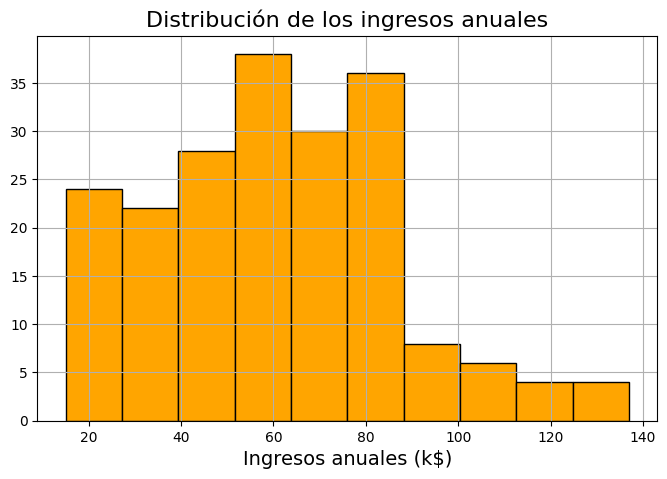

In [7]:
# Muestra mediante diagramas de barras la distribución de la la variable 'Ingresos Anuales (kEUR)'

plt.figure(figsize=(8,5))
plt.title("Distribución de los ingresos anuales",fontsize=16)
plt.xlabel ("Ingresos anuales (k$)",fontsize=14)
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color='orange',edgecolor='k')
plt.show()

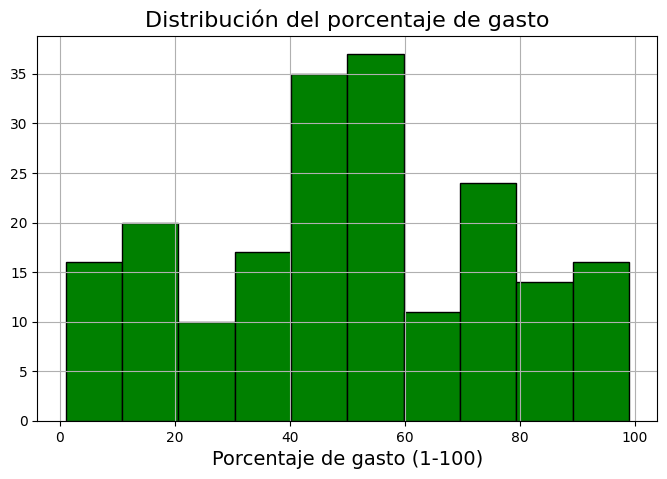

In [8]:
# Muestra mediante diagramas de barras la distribución de la la variable ‘Porcentaje_de_gasto’

plt.figure(figsize=(8,5))
plt.title("Distribución del porcentaje de gasto",fontsize=16)
plt.xlabel ("Porcentaje de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.hist(df['Spending Score (1-100)'],color='green',edgecolor='k')
plt.show()

Entonces, ¿existe una correlación definitiva entre los ingresos anuales (annual income) y el porcentaje de gasto (spending score)? - *Aparentemente no*

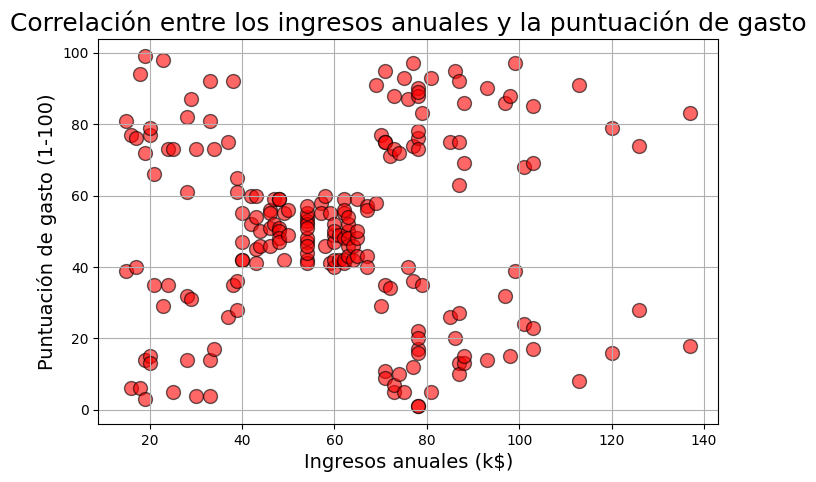

In [9]:
plt.figure(figsize=(8,5))
plt.title("Correlación entre los ingresos anuales y la puntuación de gasto",fontsize=18)
plt.xlabel ("Ingresos anuales (k$)",fontsize=14)
plt.ylabel ("Puntuación de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

¿Existe una correlación entre la edad (age) y el porcentaje de gasto (spending score)? - *Aparentemente no*

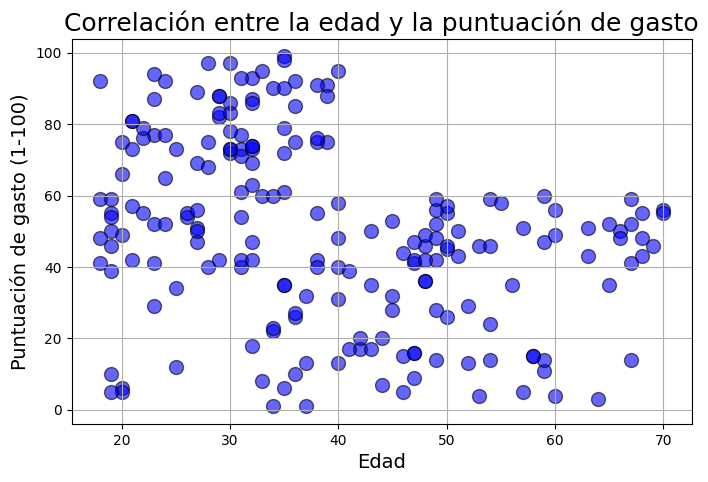

In [10]:
plt.figure(figsize=(8,5))
plt.title("Correlación entre la edad y la puntuación de gasto",fontsize=18)
plt.xlabel ("Edad",fontsize=14)
plt.ylabel ("Puntuación de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

Propuesta: repite los dos gráficos anteriores, pero en esta ocasión cambiando el color de los círculos (markers), en función del sexo de la persona.

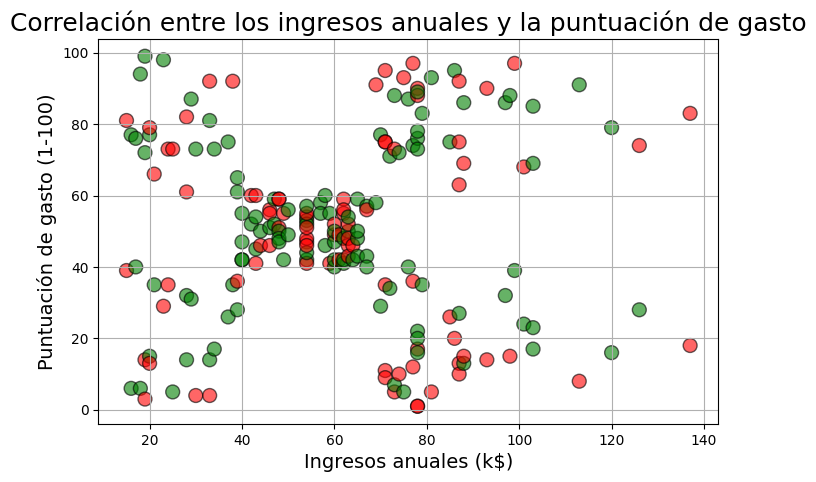

In [11]:
gender_colors = {'Male':'red', 'Female':'green'}

plt.figure(figsize=(8,5))
plt.title("Correlación entre los ingresos anuales y la puntuación de gasto",fontsize=18)
plt.xlabel ("Ingresos anuales (k$)",fontsize=14)
plt.ylabel ("Puntuación de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color=df['Gender'].map(gender_colors),edgecolor='k',alpha=0.6, s=100)
plt.show()

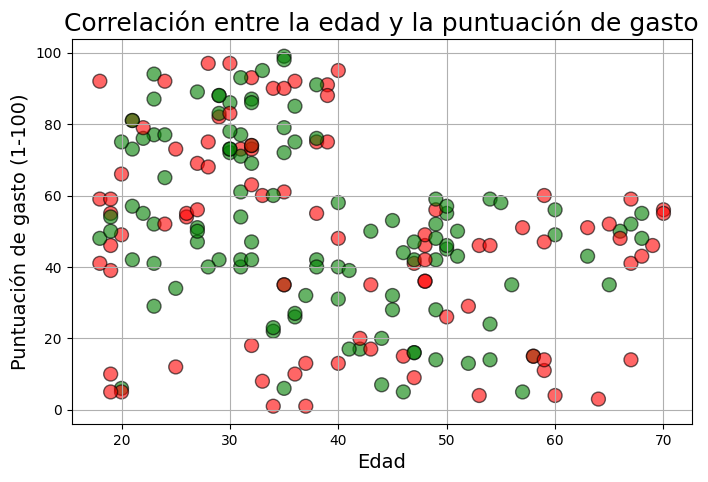

In [12]:
# Diccionario para mapear los colores por género
gender_colors = {'Male':'red', 'Female':'green'}

plt.figure(figsize=(8,5))
plt.title("Correlación entre la edad y la puntuación de gasto",fontsize=18)
plt.xlabel ("Edad",fontsize=14)
plt.ylabel ("Puntuación de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color=df['Gender'].map(gender_colors),edgecolor='k',alpha=0.6, s=100)
plt.show()

### 4.3. Estrategia

**Por lo tanto, exploraremos agrupar a los clientes en función de sus ingresos anuales y puntuación de gasto para ver si hay grupos distintivos a los que el centro comercial puede dirigirse.**

Podríamos usar K-means pero no tenemos ni idea sobre la cantidad de grupos ocultos. Veremos que el agrupamiento jerárquico con dendogramas nos dará una buena idea del número óptimo de clústeres/agrupamientos.

### 4.4. Dendogramas

Seleccionamos las columnas con los datos de ingresos anuales y puntuación de gasto

In [13]:
X = df.iloc[:,[3,4]].values

#### 4.4.1. Matriz de distancia _Ward_

En este ejemplo para crear un dendograma no utilizaremos las medidas de distancia entre clústers clásicas (simple, completo, premedio), sino que utilizaremos la matriz de distancia 'Ward'.
$$d(u,v) = \sqrt{\frac{|v|+|s|}{T}d(v,s)^2+ \frac{|v|+|t|}{T}d(v,t)^2- \frac{|v|}{T}d(s,t)^2}$$

donde **$u$** es el clúster recién unido que consta de los clústeres **$s$** y **$t$**, **$v$** es un clúster todavía no utilizado, **$ T=|v|+|s|+|t|$**, y **$|*|$** es la cardinalidad de su argumento. Esto también se conoce como el algoritmo incremental.
El [Criterio de Varianza Mínima de Ward](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Ward) minimiza la varianza total dentro de los clústers. Es decir, minimiza la suma, sobre todos los clusters, de la varianza dentro de cada cluster. En cada paso del algoritmo se debe encontrar el par de clústers que llevan al incremento mínimo de la varianza total dentro de los clústers después de mezclarlos. El par de clústers que al unirse hagan mínima la varianza total dentro de los clúster, son mezclados. En el paso inicial, todos los clúster contienen un punto único (solitario). Para aplicar el algoritmo recursivo bajo esta función objetivo, la distancia inicial entre los objetos individuales debe ser proporcional al cuadrado de la distancia euclídea.

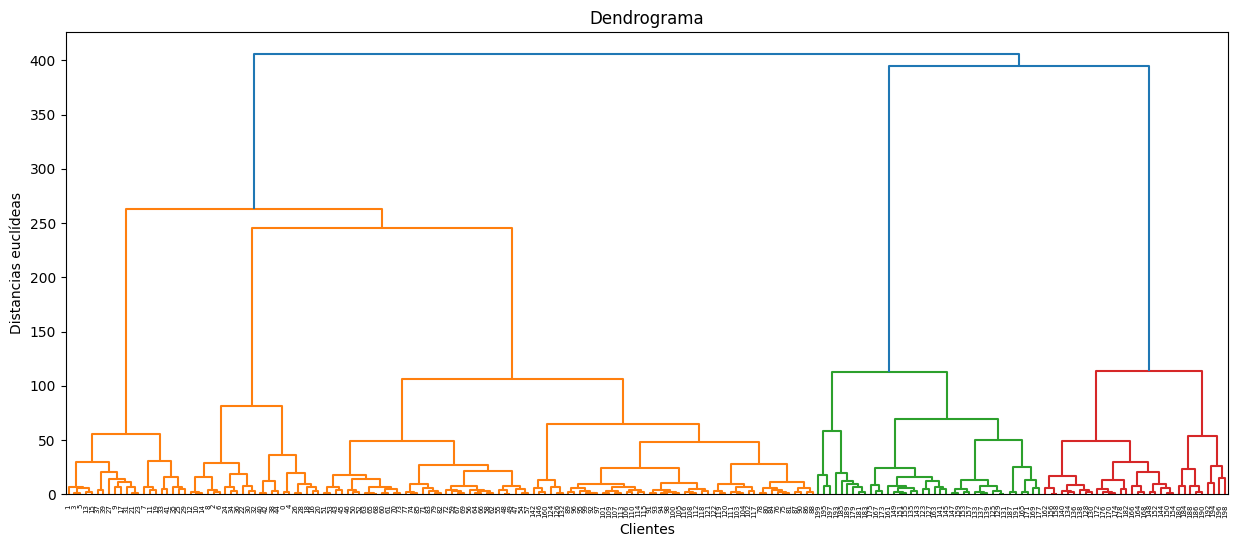

In [14]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias euclídeas')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

#### 3.4.2. Número óptimo de clústers

A menudo, el número óptimo de grupos se puede encontrar a partir de un dendograma de una manera sencilla.
* Busca el tramo más largo de la línea vertical que no esté atravesado por ninguna línea horizontal ***extendida*** (aquí *extendida* significa líneas horizontales, es decir, los divisores del grupo se extienden infinitamente en ambas direcciones).
* Ahora en el medio de ese tramo de línea y dibuja una línea horizontal imaginaria.
* Cuenta cuántas líneas verticales cruzaron esas líneas imaginarias.
* Es probable que esa sea la cantidad óptima de clústeres.

**La idea se muestra en la siguiente figura. En este caso, el número óptimo de clústeres podría ser 5.**

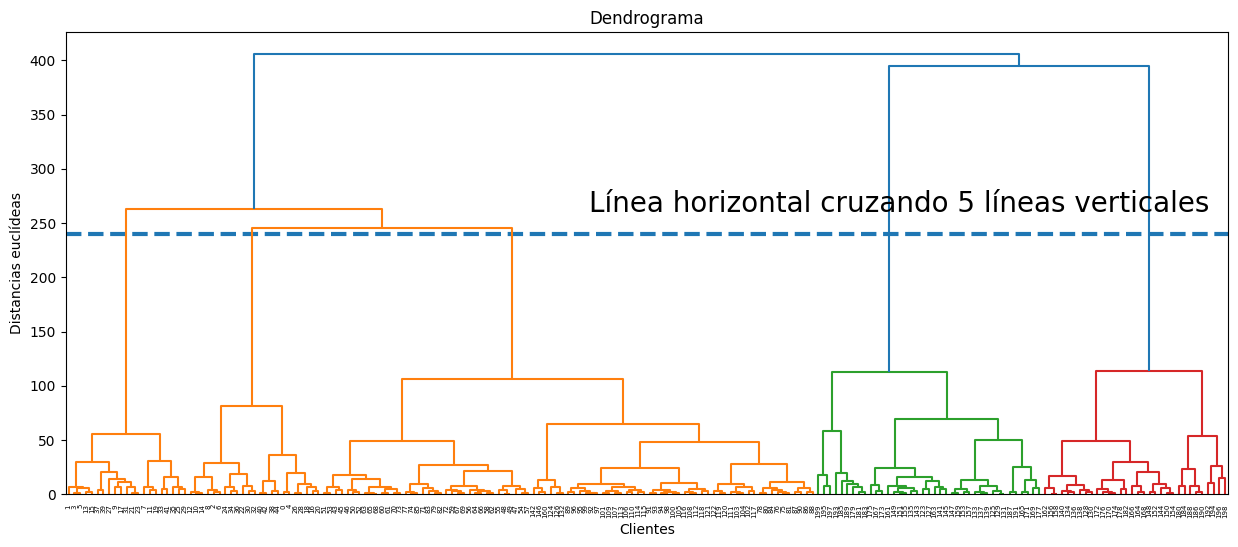

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias euclídeas')
plt.hlines(y=240,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=260,s='Línea horizontal cruzando 5 líneas verticales',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

## 3.5. Clustering Jerárquico

### 3.5.1. Creación del modelo

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### 3.5.2. Trazado de los grupos y etiquetado de los tipos de clientes
* _Cuidadoso_ - altos ingresos, pero bajos gastos
* _Estándar_: ingresos medios y consumidores medios
* **_Grupo objetivo_: ingresos medio-altos y grandes consumidores (objetivo del centro comercial)**
* _Descuidado_: bajos ingresos, pero grandes consumidores (debe evitarse debido al posible riesgo crediticio)
* _Sensible_ - bajos ingresos y bajos gastos

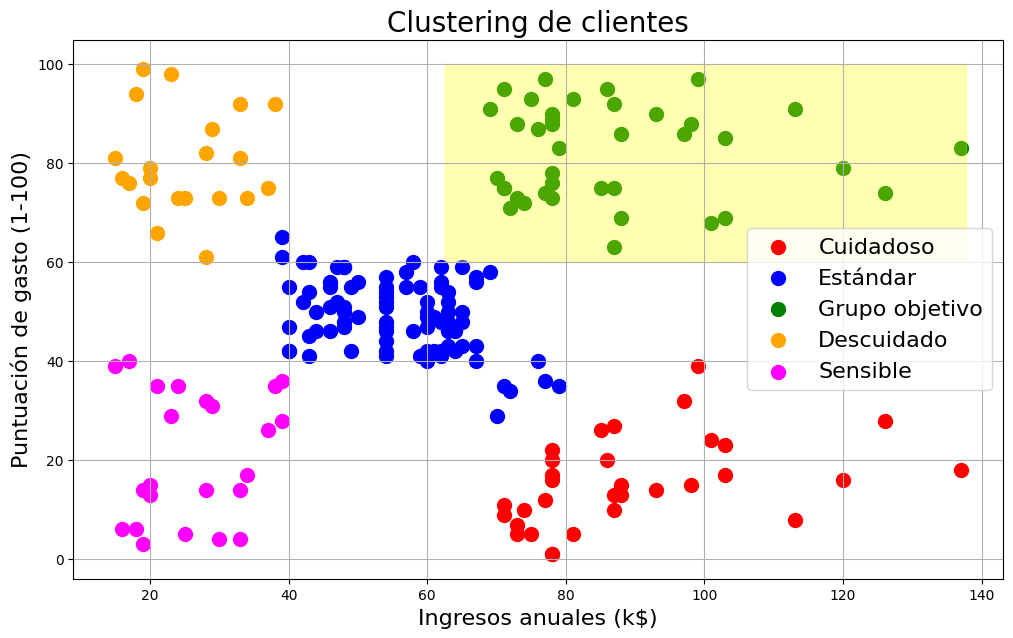

In [16]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cuidadoso')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Estándar')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Grupo objetivo')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Descuidado')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clustering de clientes',fontsize=20)
plt.xlabel('Ingresos anuales (k$)',fontsize=16)
plt.ylabel('Puntuación de gasto (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

## 3.6. Verificación del número óptimo de clústers por el algoritmo de K-means

Dado un conjunto de observaciones $(x_1, x_2, …, x_n)$, donde cada observación es un vector d-dimensional de valores reales, [**k-means clustering**](https://en.wikipedia.org/wiki/K-means_clustering) pretende particionar las *$n$* observaciones en *$k$* (≤ *$n$*) conjuntos $S = {S_1, S_2, …, S_k}$ para minimizar el suma de los cuadrados intraclúster (WCSS within-clúster sum of squares) (i.e. variance). Formalmente, el objetivo es encontrar:

$${\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$

donde $\mu_i$ es la media de puntos en $S_i$.

Ejecutamos el modelo K-means++ con centroides cuidadosamente inicializados iterando sobre el número de grupos (1 a 15) y mostramos ***la matriz de valores de suma de cuadrados de los clústers (WCSS)*** para determinar el número óptimo de clústers por el método del Elbow.

In [17]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

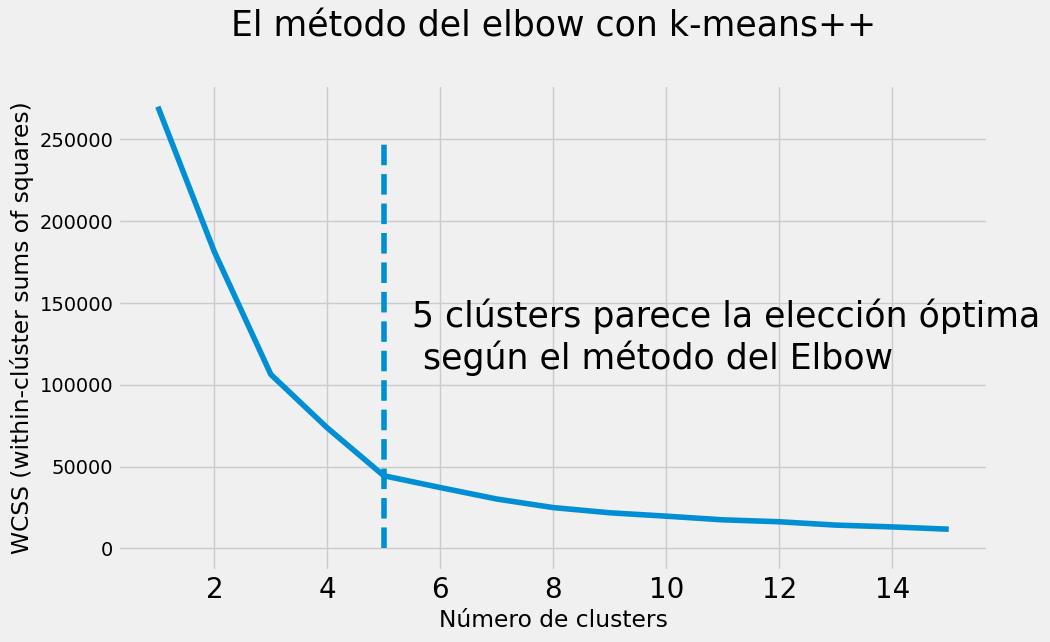

In [18]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('El método del elbow con k-means++\n',fontsize=25)
    plt.xlabel('Número de clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-clúster sums of squares)')
    plt.vlines(x=5,ymin=0,ymax=250000,linestyles='--')
    plt.text(x=5.5,y=110000,s='5 clústers parece la elección óptima\n según el método del Elbow',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

# Ejercicios

Antes de realizar los ejercicios, revisa los conceptos adquiridos durante la sesión leyendo el [pdf del profesor Fernando Berzal](data/Clustering-Hierarchical.pdf) sobre esta temática.

**1. Comprueba si según el método del Silhoutte Score el número óptimo de clusteres para este dataset es 5.**

In [19]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

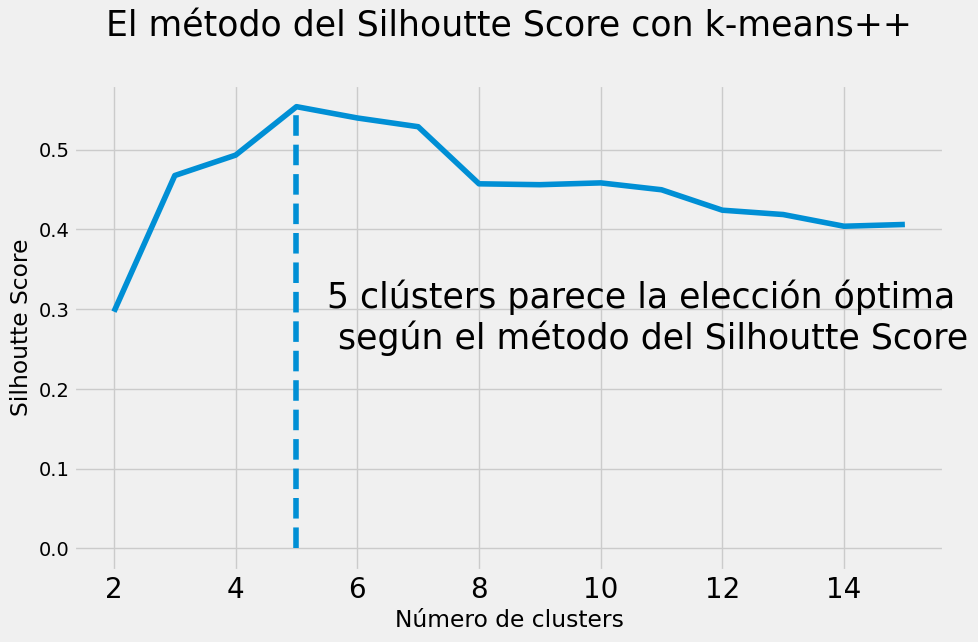

In [20]:
scores = []
min_k = 2
max_k = 15

for i in range(min_k, max_k+1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(2, 16), scores)
    plt.title('El método del Silhoutte Score con k-means++\n',fontsize=25)
    plt.xlabel('Número de clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('Silhoutte Score')
    plt.vlines(x=5,ymin=0,ymax=0.55,linestyles='--')
    plt.text(x=5.5,y=0.25,s='5 clústers parece la elección óptima\n según el método del Silhoutte Score',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

**2. Interpreta la siguiente imagen de un dendograma y extrae conclusiones. ¿Cuántos clusteres deberían de crearse? ¿Por qué? ¿Qué representan las flechas?**
<img src=img/ejercicio2.png>

La altura de los nodos representa la similitud (distancia) entre los clústers que se fusionan. En la imagen se ve como los puntos más alejados son los últimos en fusionarse con el clúster principal. 
En este caso se observa claramente que se deberían crear dos clústers. Las flechas indican el nodo del dendrograma que representa las muestras de las que parten las flechas.

**3. ¿Cuales son las principales diferencias entre el algoritmo K-means y el Clustering Jerárquico?**

K-means requiere que se fije k antes de ejecutar el algoritmo mientras que en el clustering jerárquico no. Además este último proporciona información de las agrupaciones intermedias. El clustering jerárquico no crea fornteras de decisión como KMeans por lo que no se pueden hacer predicciones con nuevas muestras.

**4. Toma como base el dataset winequality-red.csv y aplica un algoritmo de clustering jerárquico a dicho dataset considerando las features: pH, alcohol, sulphates y total sulfur dioxide. Responde a las siguientes preguntas: 4.1. ¿Cuál es la media, max, min de dichas características? 4.2. ¿Cuál es la distribución espacial del dataset? Obtén una representación gráfica. 4.3. ¿Cuál es el número óptimo de clústers que obtienes para este dataset? 4.4. Una vez obtenido el valor óptimo de K, genera un modelo AgglomerativeClustering y entrénalo con los datos anteriores- 4.5. Invéntate diversas predicciones para saber en qué clúster se asignan.**

Cargamos el dataset en un DataFrame:

In [21]:
df_wine = pd.read_csv('data/winequality-red.csv', sep=";")
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Seleccionamos las features: pH, alcohol, sulphates y total sulfur dioxide

In [23]:
df_wine_sel = df_wine.loc[:, ["pH", "alcohol", "sulphates", "total sulfur dioxide"]]
df_wine_sel

Todos los valores son numéricos:

In [24]:
df_wine_sel.dtypes

pH                      float64
alcohol                 float64
sulphates               float64
total sulfur dioxide    float64
dtype: object

Y no tenemos valores nulos

In [25]:
df_wine_sel.isnull().sum()

pH                      0
alcohol                 0
sulphates               0
total sulfur dioxide    0
dtype: int64

Mostramos la media, el valor mínimo y máximo de cada característica:

In [26]:
df_wine_sel.describe().T[['mean', 'min', 'max']]

,mean,min,max
pH,3.311113,2.74,4.01
alcohol,10.422983,8.40,14.90
sulphates,0.658149,0.33,2.00
total sulfur dioxide,46.467792,6.00,289.00


Visualizamos las relaciones entre las características 

Número de combinaciones posibles de features: 6


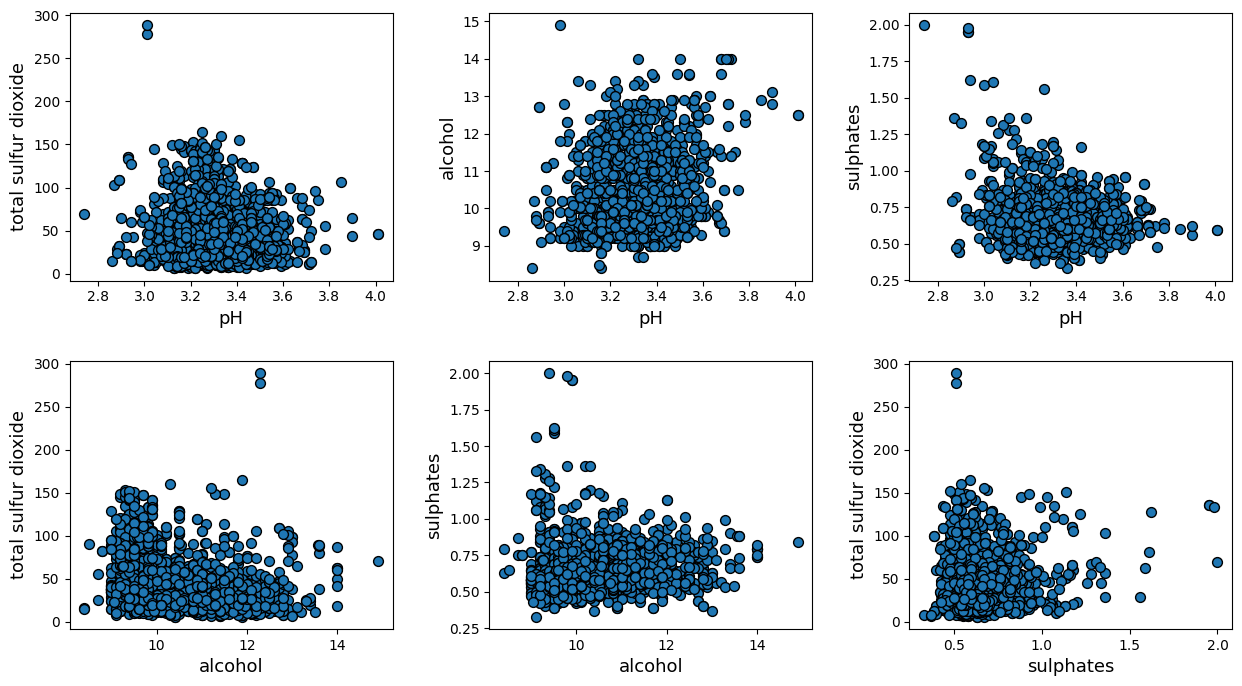

In [27]:
from itertools import combinations
lst_vars=list(combinations(df_wine_sel.columns,2))
#lst_vars=list(combinations(df_scaled.columns,2))

print("Número de combinaciones posibles de features:", len(lst_vars))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)


# Número de gráficas
n_plots = len(lst_vars)
n_cols = 3
n_rows = 2

for i in range(1,n_plots+1):
    plt.subplot(n_rows,n_cols,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1-1][1]
    plt.scatter(df_wine_sel[dim1], df_wine_sel[dim2],edgecolor='k',s=50)
    #plt.scatter(df_scaled[dim1], df_scaled[dim2],edgecolor='k',s=50)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

Contrastando todas las carácterísticas no se observa una correlación aparente entre ninguna de ellas.

Escalamos los datos:

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_wine_sel)
df_scaled = pd.DataFrame(df_scaled, columns=df_wine_sel.columns)
df_scaled.head()

,pH,alcohol,sulphates,total sulfur dioxide
0,1.288643,-0.960246,-0.579207,-0.379133
1,-0.719933,-0.584777,0.128950,0.624363
2,-0.331177,-0.584777,-0.048089,0.229047
3,-0.979104,-0.584777,-0.461180,0.411500
4,1.288643,-0.960246,-0.579207,-0.379133


Visualizamos el dendrograma del dataset utilizando la matriz de distancia Ward

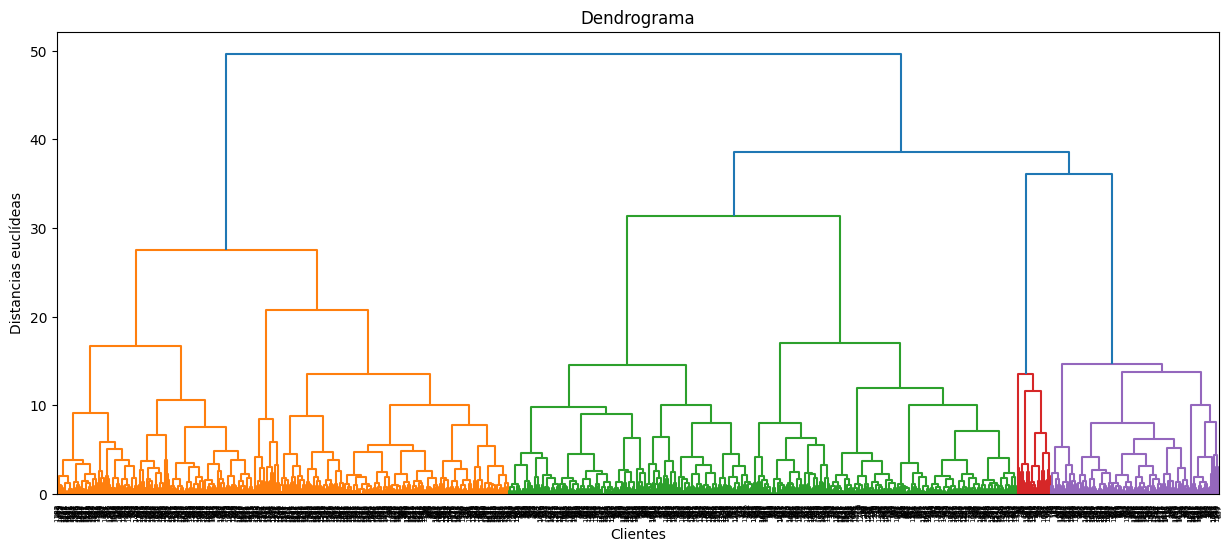

In [30]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias euclídeas')
#plt.grid(True)
#dendrogram = sch.dendrogram(sch.linkage(df_wine_sel, method = 'ward'))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.show()

Según el dendrograma habría 4 clústeres. Vamos a contrastar el resultado con los métodos del ELbow y del Silhoutte Score.

Empleamos el método del Elbow y de Silhoutte Score para determinar el valor de K.

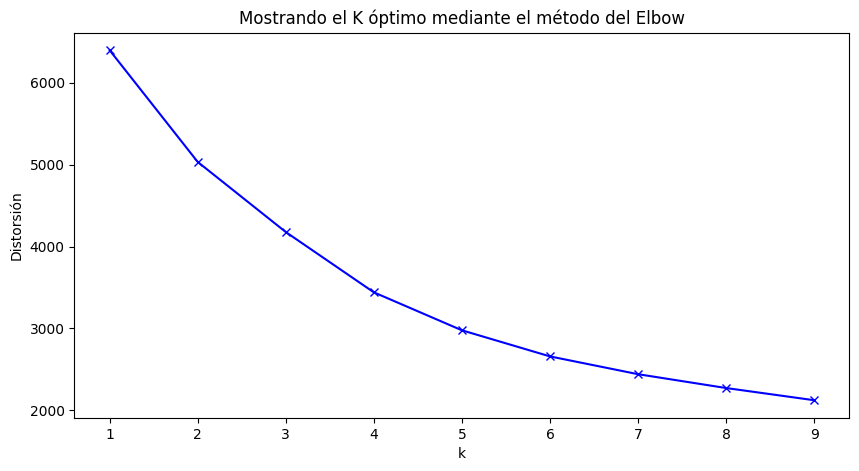

In [31]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=20)
    #kmeanModel.fit(df_wine_sel)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)
# Representa gráficamente la evolución de la distorsión en función de K
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

En este caso con el método Elbow el 'codo' no se aprecia claramente.

Cálculamos el valor de k óptimo con el método Silhoutte Score

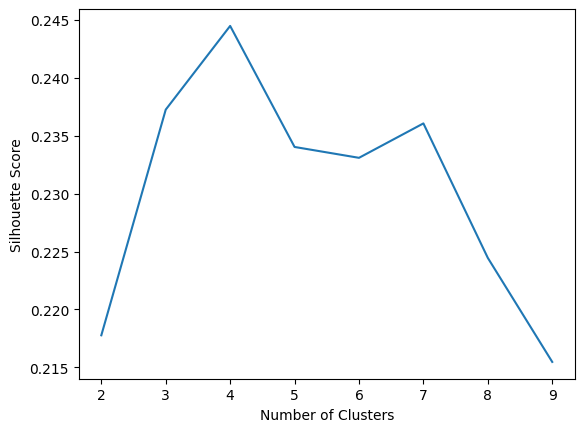

In [32]:
scores = list()
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=20)
    #kmeans.fit(df_wine_sel)
    kmeans.fit(df_scaled)
    #scores.append(silhouette_score(df_wine_sel, kmeans.labels_, metric='euclidean'))
    scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean'))

plt.plot(list(range(2, 10)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

El método de Silhoutte Score también determina que el número de clústers óptimo es 4, al igual que determinamos en el dendrograma.

Por lo tanto, generamos un modelo de AgglomerativeClustering para 4 clústers

In [33]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

Visualizamos los datos de acuerdo al agrupamiento obtenido

Número de combinaciones posibles de features: 6


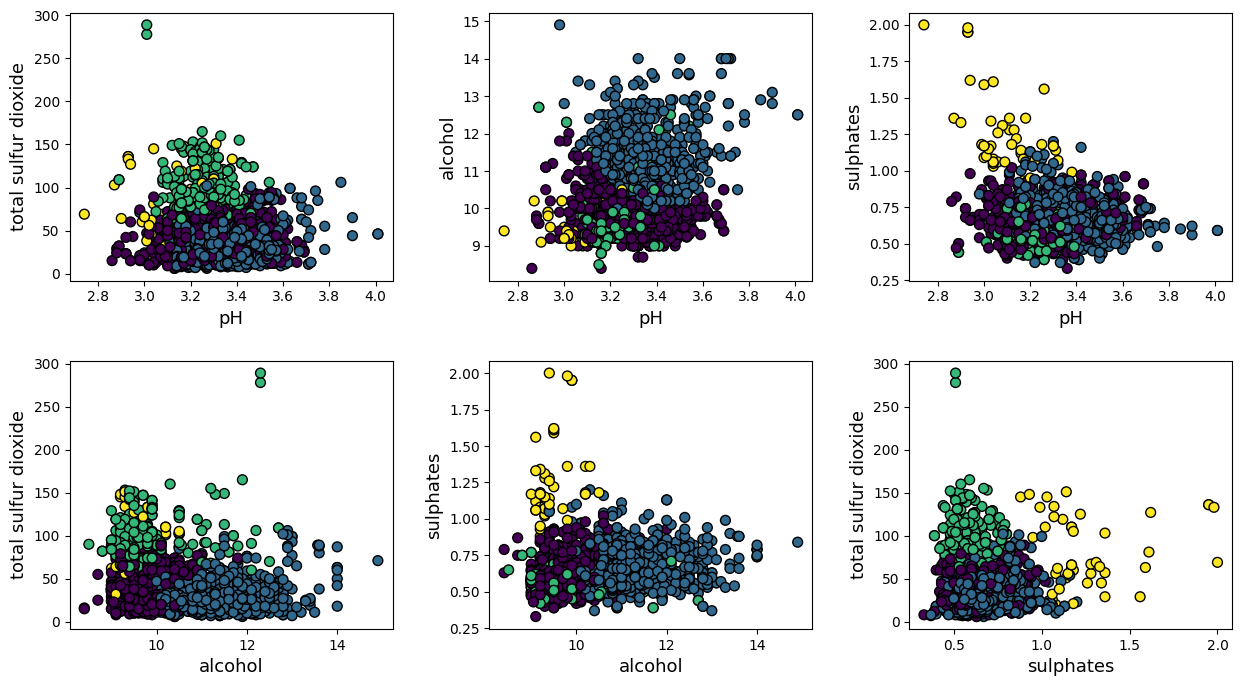

In [34]:
from itertools import combinations
lst_vars=list(combinations(df_wine_sel.columns,2))

print("Número de combinaciones posibles de features:", len(lst_vars))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)


# Número de gráficas
n_plots = len(lst_vars)
n_cols = 3
n_rows = 2

for i in range(1,n_plots+1):
    plt.subplot(n_rows,n_cols,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1-1][1]
    plt.scatter(df_wine_sel[dim1], df_wine_sel[dim2],c=y_hc, edgecolor='k',s=50)
    #plt.scatter(df_scaled[dim1], df_scaled[dim2],c=y_hc, edgecolor='k',s=50)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

El clustering aglomerativo fusiona datos de acuerdo a su similitud pero no define las regiones de los clústeres por lo que no se puede realizar predicciones.

Como alternativa podríamos usar un modelo de KMeans con k=4 y hacer predicciones sobre este modelo (aunque el agrupamiento ya sería distinto).

In [37]:
new_data = [[3., 12., 1.5, 40.], [2.9, 9., .6, 50.], [3., 12., 1.5, 80.], [2.9, 9., .6, 140.]]
new_data = [[.05, .2, .01,.95], [.15, .2, .06,.95], [.10, .75, .04,.6], [.5, .8, .04,.6]]

#new_data_scaled = normalize(new_data)

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20)
kmeans.fit(df_scaled)
kmeans.predict(new_data)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 0, 3, 3], dtype=int32)

In [ ]:
# ph-alcohol-sulphates-total sulfur dioxide


# Webgrafia

[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[Apuntes de Fernando Berzal de la Universidad de Granada](https://elvex.ugr.es/idbis/dm/slides/42%20Clustering%20-%20Hierarchical.pdf)
Curso de la Xunta de Galicia impartido por Alfonso Antolínez
[DataCamp](https://www.datacamp.com/)

# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.